# Assignment 3
## Part 1 of 2
### Questions
1. What is the advantage of using the Apriori algorithm in comparison with computing the support of every subset of an itemset in order to find the frequent itemsets in a transaction dataset?
2. Let $\mathcal{L}_1$ denote the set of frequent $1$-itemsets. For $k \geq 2$, why must every frequent $k$-itemset be a superset of an itemset in $\mathcal{L}_1$?
3. Let $\mathcal{L}_2 = \{ \{1,2\}, \{1,4\}, \{2, 3\}, \{2, 4\}, \{3, 5\}\}$. Compute the set of candidates $\mathcal{C}_3$ that is obtained by joining every pair of joinable itemsets from $\mathcal{L}_2$.
4. Let $S_1$ denote the support of the association rule $\{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}$. Let $S_2$ denote the support of the association rule $\{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}$. What is the relationship between $S_1$ and $S_2$?
5. What is the support of the rule $\{  \} \Rightarrow \{ \text{Eggs} \}$ in the transaction dataset used in Section 1 of this lab notebook?
6. In the transaction dataset used in the tutorial presented above, what is the maximum length of a frequent itemset for a support threshold of 0.2?
7. Implement a function that computes the Kulczynski measure of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the Kulczynski measure for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.
8. Implement a function that computes the imbalance ratio of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the imbalance ratio for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.

### Question 1
Rather than computing every possible combination, apriori works in levels, first calculating
the support of each itemset in the first level, and then pruning this to only items that are frequent (i.e over the support threshold set by the implementer). By this method, the algorithm only checks if itemsets are frequent if a subset of them was frequent in the previous level, and eventually stopping when a grown list is not frequent. This optimisation saves on computing cost because the number of itemsets reduce after each level.

### Question 2
If the itemset $L1$ is not frequent to start with, supersets of that itemset are unlikely to be frequent themselves. We are not-interested in not-frequent supersets, hence, to avoid a waste of time checking these supersets, all supersets must have frequent subsets from $L1$.

### Question 3
$L_2$ = {{1,2},{1,4},{2,3},{2,4},{3,5}}

$C_3$ = {{1,2,4},{2,3,4}}

In ascending order.

### Question 4

$S2$ is most likely a subset of $S1$. However, we can say that the support of $S1$ cannot be more than $S2$, as $S1$ relies of the support of $S2$. Because of the added item in $S1$, it cannot occur more frequently than $S2$.

In Maths:<br>
$$ S2_{support} > S1_{support} $$
<br>
    $$ \displaystyle \Bigg[{{boarding pass \bigcup flight}}\Bigg] > \Bigg[{{boarding pass \bigcup passport \bigcup flight}}\Bigg]$$

### Question 5
$p(Eggs) = 4/5 $

$\{  \} \Rightarrow \{ \text{Eggs} \} = 0.8 $

### Question 6
The number of transactions is 5, so every itemset has a support of at least 1/5 = 0.2. Therefore, if the threshold is set at 0.2, all itemsets are let through the first level of the apriori algorithm. And as the iterations increase, there is always a superset that satisfies the minimum support threshold up the maximum we see from the input data (we see the maximum transaction length is 6). Hence, the maximum frequent itemset we see is 6.

### Question 7
First I will set up the apriori and association rules to work in this notebook, on the same dataframe

In [1]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
support = {}

for _, row in frequent_itemsets.iterrows():
    support[row['itemsets']] = row['support']

From mapping the frozenset to a dictionary, I can extract the support values I require for the kulczynski measure.

Easiest thing to do is to work out the confidence first from the support values:

<br>
$$ P(B|A) = {\frac {support (A \cup B)}{support (A)}} = {\frac {support (Onion, Kidney Beans, Eggs)}{support(Onion)}} $$

$$ P(A|B) = {\frac {support (A \cup B)}{support (B)}} = {\frac {support (Onion, Kidney Beans, Eggs)}{support(Kidney Beans, Eggs)}} $$

$ P(A \cup B) $ in the code is variable 'C'

In [6]:
def kulc(dataset, A_list, B_list, min_support):
    te = TransactionEncoder()
    te_ary = te.fit_transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support, use_colnames=True)
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    
    
    A = support[frozenset(A_list)] # this is support A
    B = support[frozenset(B_list)] # this is support B
    union = A_list + B_list
    C = support[frozenset(union)] ## this is support A union B

    b_give_a = C/A
    a_give_b = C/B
    kulc = 0.5 * (b_give_a + a_give_b)
    return kulc

print("The Kulczynski Measure for question 7 is " + str(kulc(dataset, ['Onion'], ['Kidney Beans', 'Eggs'], 0.6)))

The Kulczynski Measure for question 7 is 0.875


### Question 8
Making the imbalance ratio function

In [8]:
def IR(dataset, A_list, B_list, min_support):
    te = TransactionEncoder()
    te_ary = te.fit_transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support, use_colnames=True)
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    
    
    A = support[frozenset(A_list)] # this is support A
    B = support[frozenset(B_list)] # this is support B
    union = A_list + B_list
    C = support[frozenset(union)] ## this is support A union B
    
    top = abs(A - B)
    bottom = A + B - C
    return top/bottom

print("The imbalance ratio for question 8 is " + str(IR(dataset, ['Onion'], ['Kidney Beans', 'Eggs'], 0.6)))

The imbalance ratio for question 8 is 0.2500000000000001


## Part 2 of 2
## Questions
1. For an application on credit card fraud detection, we are interested in detecting contextual outliers. Suggest 2 possible contextual attributes and 2 possible behavioural attributes that could be used for this application, and explain why each of your suggested attribute should be considered as either contextual or behavioural.

2. Assume that you are provided with the [University of Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from the Week 3 lab, and that you are asked to detect outliers from this dataset. Additional information on the dataset attributes can be found [online](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names). Explain one possible outlier detection method that you could apply for detecting outliers for this particular dataset, explain what is defined as an outlier for your suggested approach given this particular dataset, and justify why would you choose this particular method for outlier detection.

3. The monthly rainfall in the London borough of Tower Hamlets in 2019 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.

4. Using the stock prices dataset used in sections 1 and 2 of this lab notebook, estimate the outliers in the dataset using the one-class SVM classifier approach. As input to the classifier, use the percentage of changes in the daily closing price of each stock, as was done in section 1 of the notebook. Plot a 3D scatterplot of the dataset, where each object is color-coded according to whether it is an outlier or an inlier. Also compute a histogram and the frequencies of the estimated outlier and inlier labels. In terms of the plotted results, how does the one-class SVM approach for outlier detection differ from the parametric and proximity-based methods used in the lab notebook? What percentage of the dataset objects are classified as outliers?

5. This question will combine concepts from both data preprocessing and outlier detection. Using the house prices dataset from Section 3 of this lab notebook, perform dimensionality reduction on the dataset using PCA with 2 principal components (make sure that the dataset is z-score normalised beforehand, and remember that PCA should only be applied on the input attributes). Then, perform outlier detection on the pre-processed dataset using the k-nearest neighbours approach using k=2. Display a scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score.

### Question 1
Contextual attributes could be the credit limit and the location of transaction. For example, it would be out of character for a person with d a high credit limit to be using nearly all their credit limit. However, it would not be out of character for someone who has a low credit limit to be using nearly all their credit limit. It would also be strange if a transaction in a restaurant area was high value (like for a car), but not strange if the transaction for a high value was completed in an area with many car dealerships. These is considered contextual because it is pre-defined.

Behaivioural attributes could be the % use of credit limit in previous months and the difference in location of normal spending. For example, it is not unusual if someone who averages 70% use of their credit limit to use 70% in the next month, however, if they average only 20% use in previous months then this is unusual. Likewise, if a person always spends in Birmingham but an hour later spends in Dublin, this is unusual behaiviour. 

### Question 2
A possibility is to use SVM to classify a label to the outliers from attributes 2-10 in the .names file. We can validate or test the accuracy by using the class attribute which will be our actual label, because it is a classification problem. In this case, the outliers are also a class, so it is logical to 'kill two birds with one ston'e. SVM is useful for this because it uses the density of the attributes. The majority of breast screening results in a benign outcome and so these 'normal' attributes will be densely packed together, thus, we would expect an outlier to be class 4 (malignant), and a inlier to be class 2 (benign).

Furthermore, due to the rarity of malignancy, a standard model will be vulnerable to giving values of high accuracy, but this is due to the rarity of one of the variables. Using SVM as an outlier detection tool will combat this.

### Question 3

In [7]:
rain = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]
mu = sum(rain)/len(rain)
mu

22.535

$\hat{μ} = 22.535 $

In [8]:
rain_difs = []

for i in rain:
    dif = i - mu
    rain_difs.append(dif**2)

var = sum(rain_difs)/len(rain)
std = var**0.5
print("Standard Deviation: " + str(std))

lower = mu - (std * 3)
upper = mu + (std * 3)

print("Lower limit: " + str(lower))
print("Upper limit: " + str(upper))

Standard Deviation: 6.130045540885756
Lower limit: 4.144863377342734
Upper limit: 40.92513662265726


In [9]:
for i in rain:
    if i < lower:
        print("Outlier: " + str(i))
    elif i > upper:
        print("Outlier: " + str(i))
    else:
        pass


Outlier: 3.25


$\hat{σ} = 6.13 $

$ μ±3σ $ contains 99.7% of normal data

Therefore, the lower limit is 4.1 and the upper 40.9, only the value 3.25 is out of these bounds, hence we classify this as an outlier.


### Question 4

In [80]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)

data = delta.values
X = data
ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X)

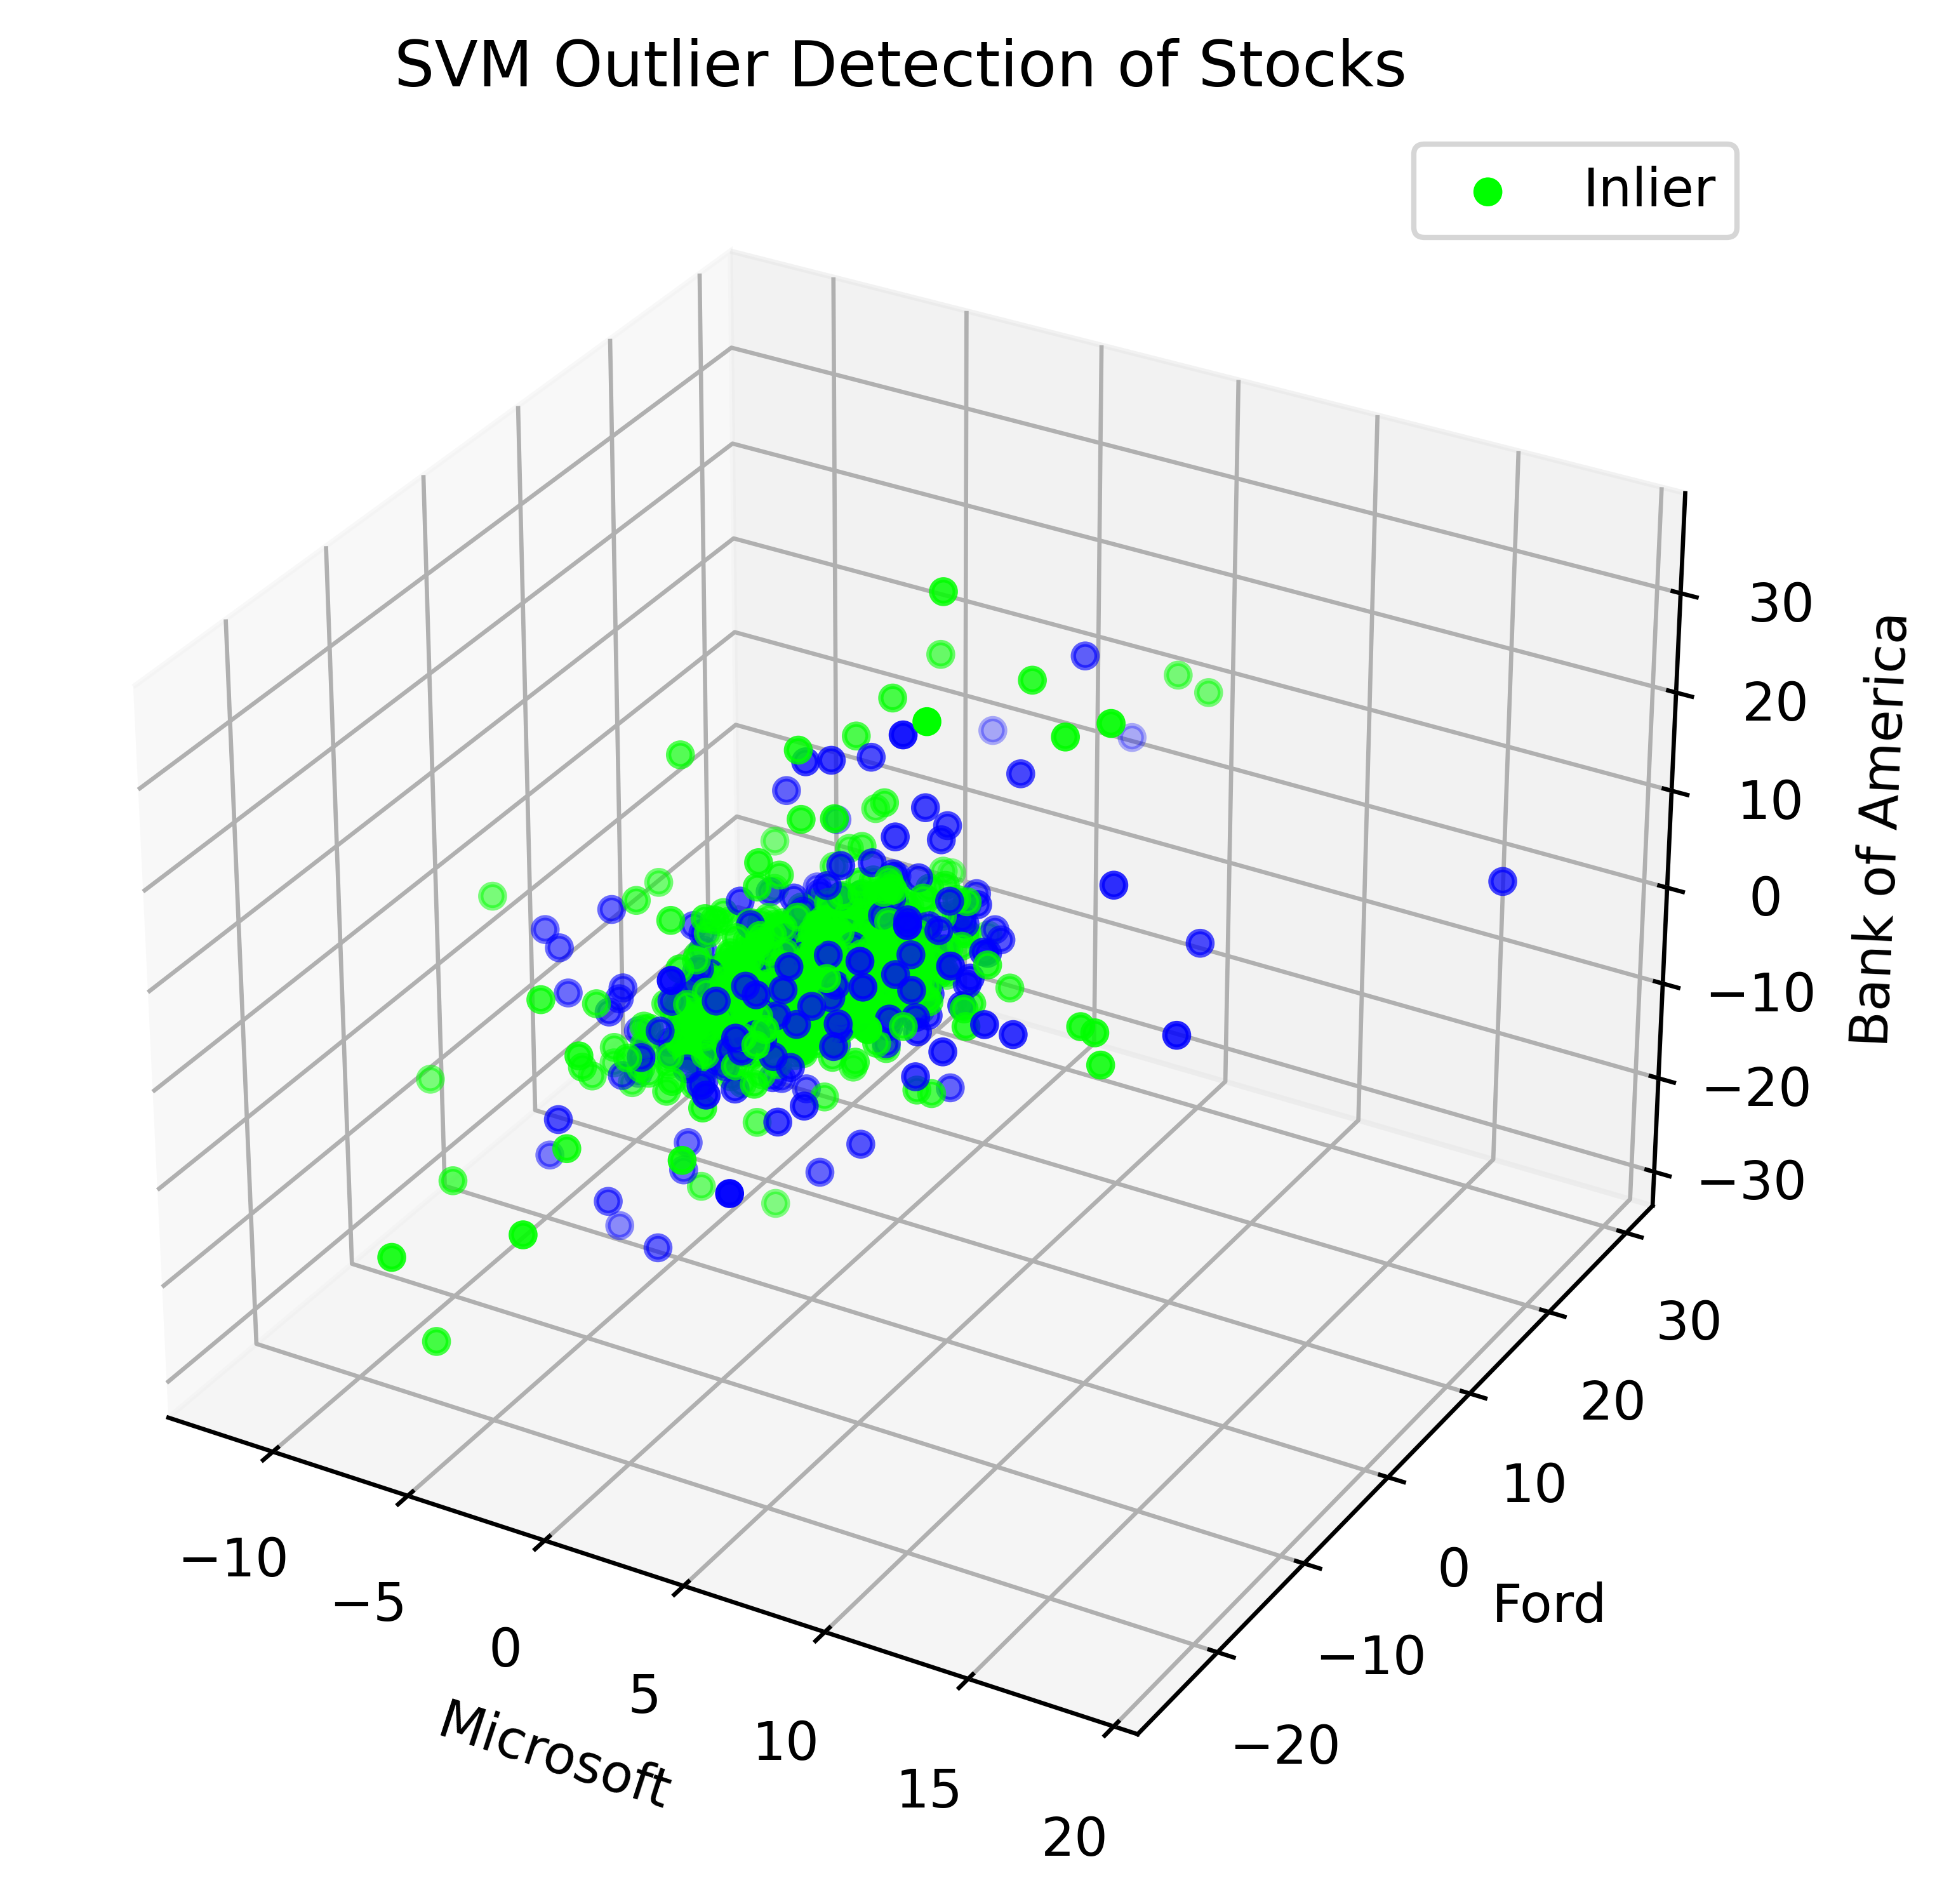

In [18]:
fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=mask,cmap='brg',s=20)
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
ax.set_title('SVM Outlier Detection of Stocks')
ax.legend(['Inlier'])
plt.show()

Text(0.5, 1.0, 'Frequency of inliner (1) and outlier (-1)')

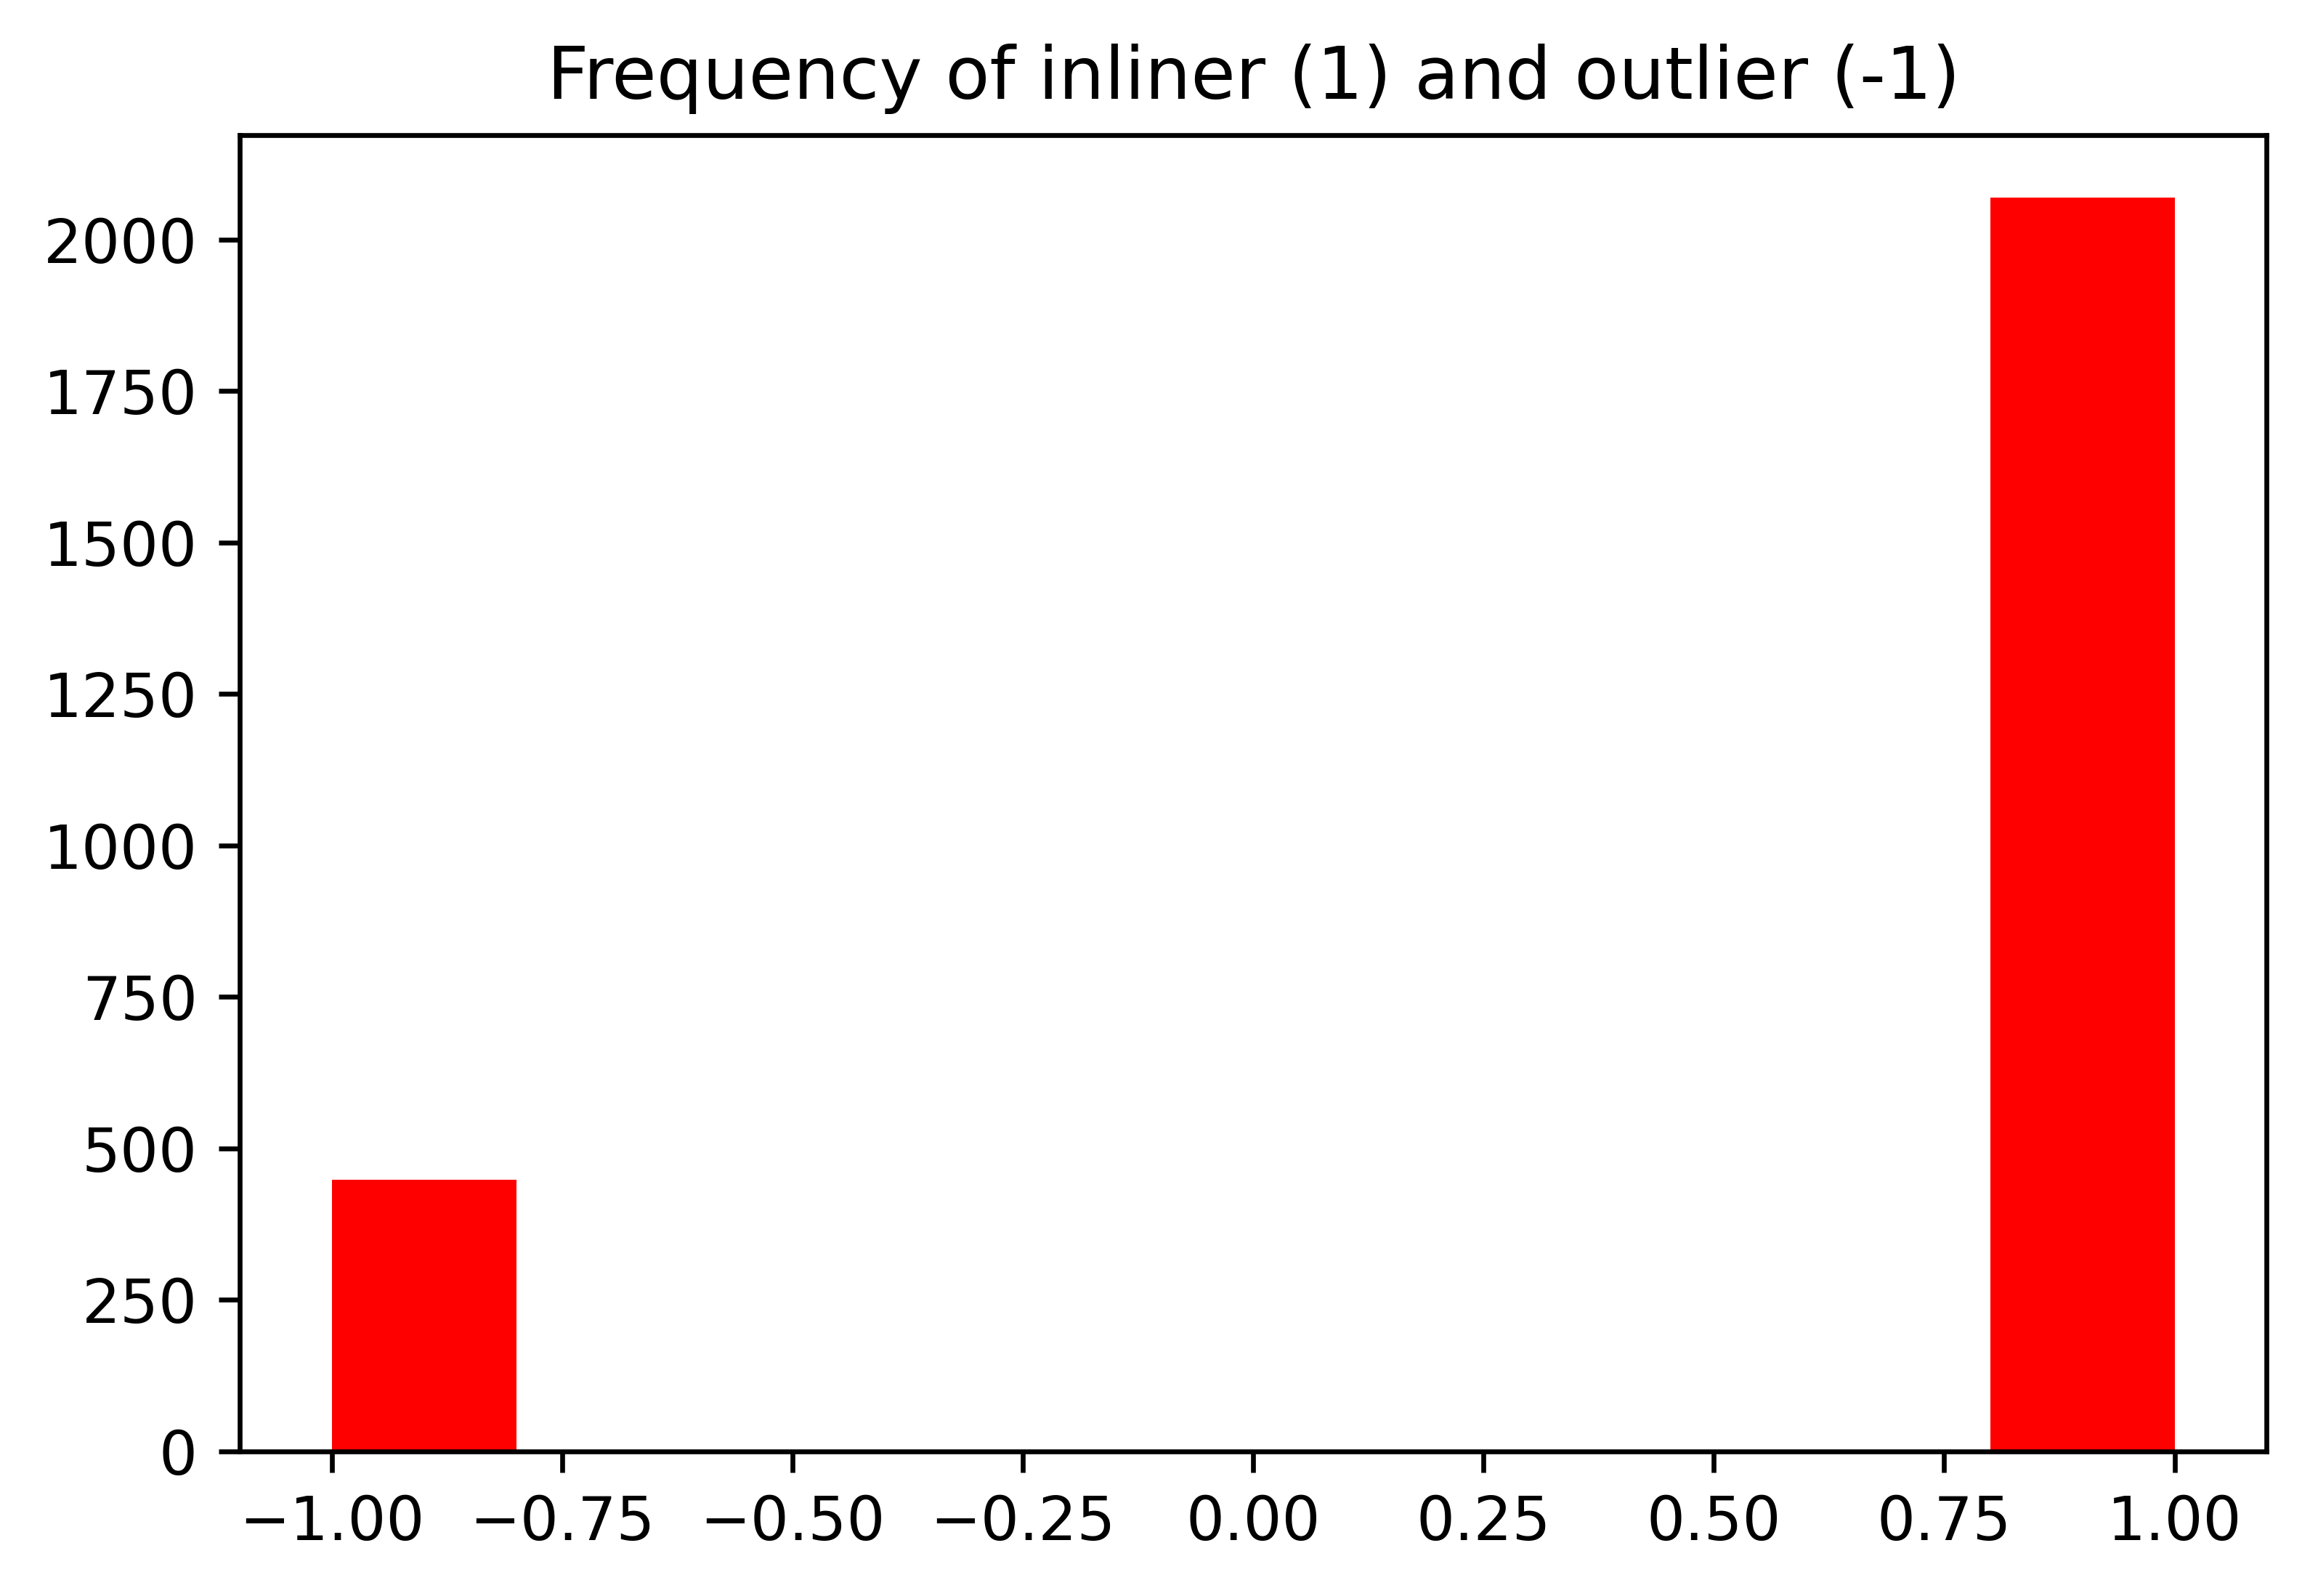

In [13]:
fig, (a1) = plt.subplots(1,1, dpi=600)
a1.hist(yhat, color="red")

a1.set_title("Frequency of inliner (1) and outlier (-1)")

In [122]:
print("Inlier Count: " + str(np.count_nonzero(yhat == 1)))
print("Outlier Count: " + str(np.count_nonzero(yhat == -1)))

Inlier Count: 2069
Outlier Count: 448


In [123]:
perc = (np.count_nonzero(yhat == -1) / len(yhat))*100
print("Percentage classified as outliers: " + str(perc) + "%")

Percentage classified as outliers: 17.798967024235203%


The SVM performs worse than the other methods in this case. Although only 17.8% of the dataset is classified as outliers, the plotted results show that all the inliers and outliers are mixed. Other methods like the parametric method showed clearly that outliers were far away from the rest of the data, and this is the same for K-nearest neighbours, whereas the SVM method looks mixed.

### Question 5
#### Pre-processing

In [15]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from sklearn.decomposition import PCA

# Loading data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url)
df.columns = ['Crime', 'Lots', 'Non-retail', 'Dummy River', 'NOX', 'Rooms', 'Historic', 'Employment',
             'Accessible', 'Tax', 'Education', 'Blacks', 'Lower Class', 'Price']

# Dropping Target
df_drop = df.drop(['Price'], axis=1)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_drop)

# PCA
pca = PCA(n_components = 2)
dim_reduced = pca.fit_transform(scaled_data)
dim_reduced

array([[-1.46081041,  0.59352271],
       [-2.07776946,  0.60032089],
       [-2.61482382, -0.00564587],
       ...,
       [-0.31610302,  1.15415466],
       [-0.27432961,  1.04074719],
       [-0.12985808,  0.76281916]])

#### Outlier Detection

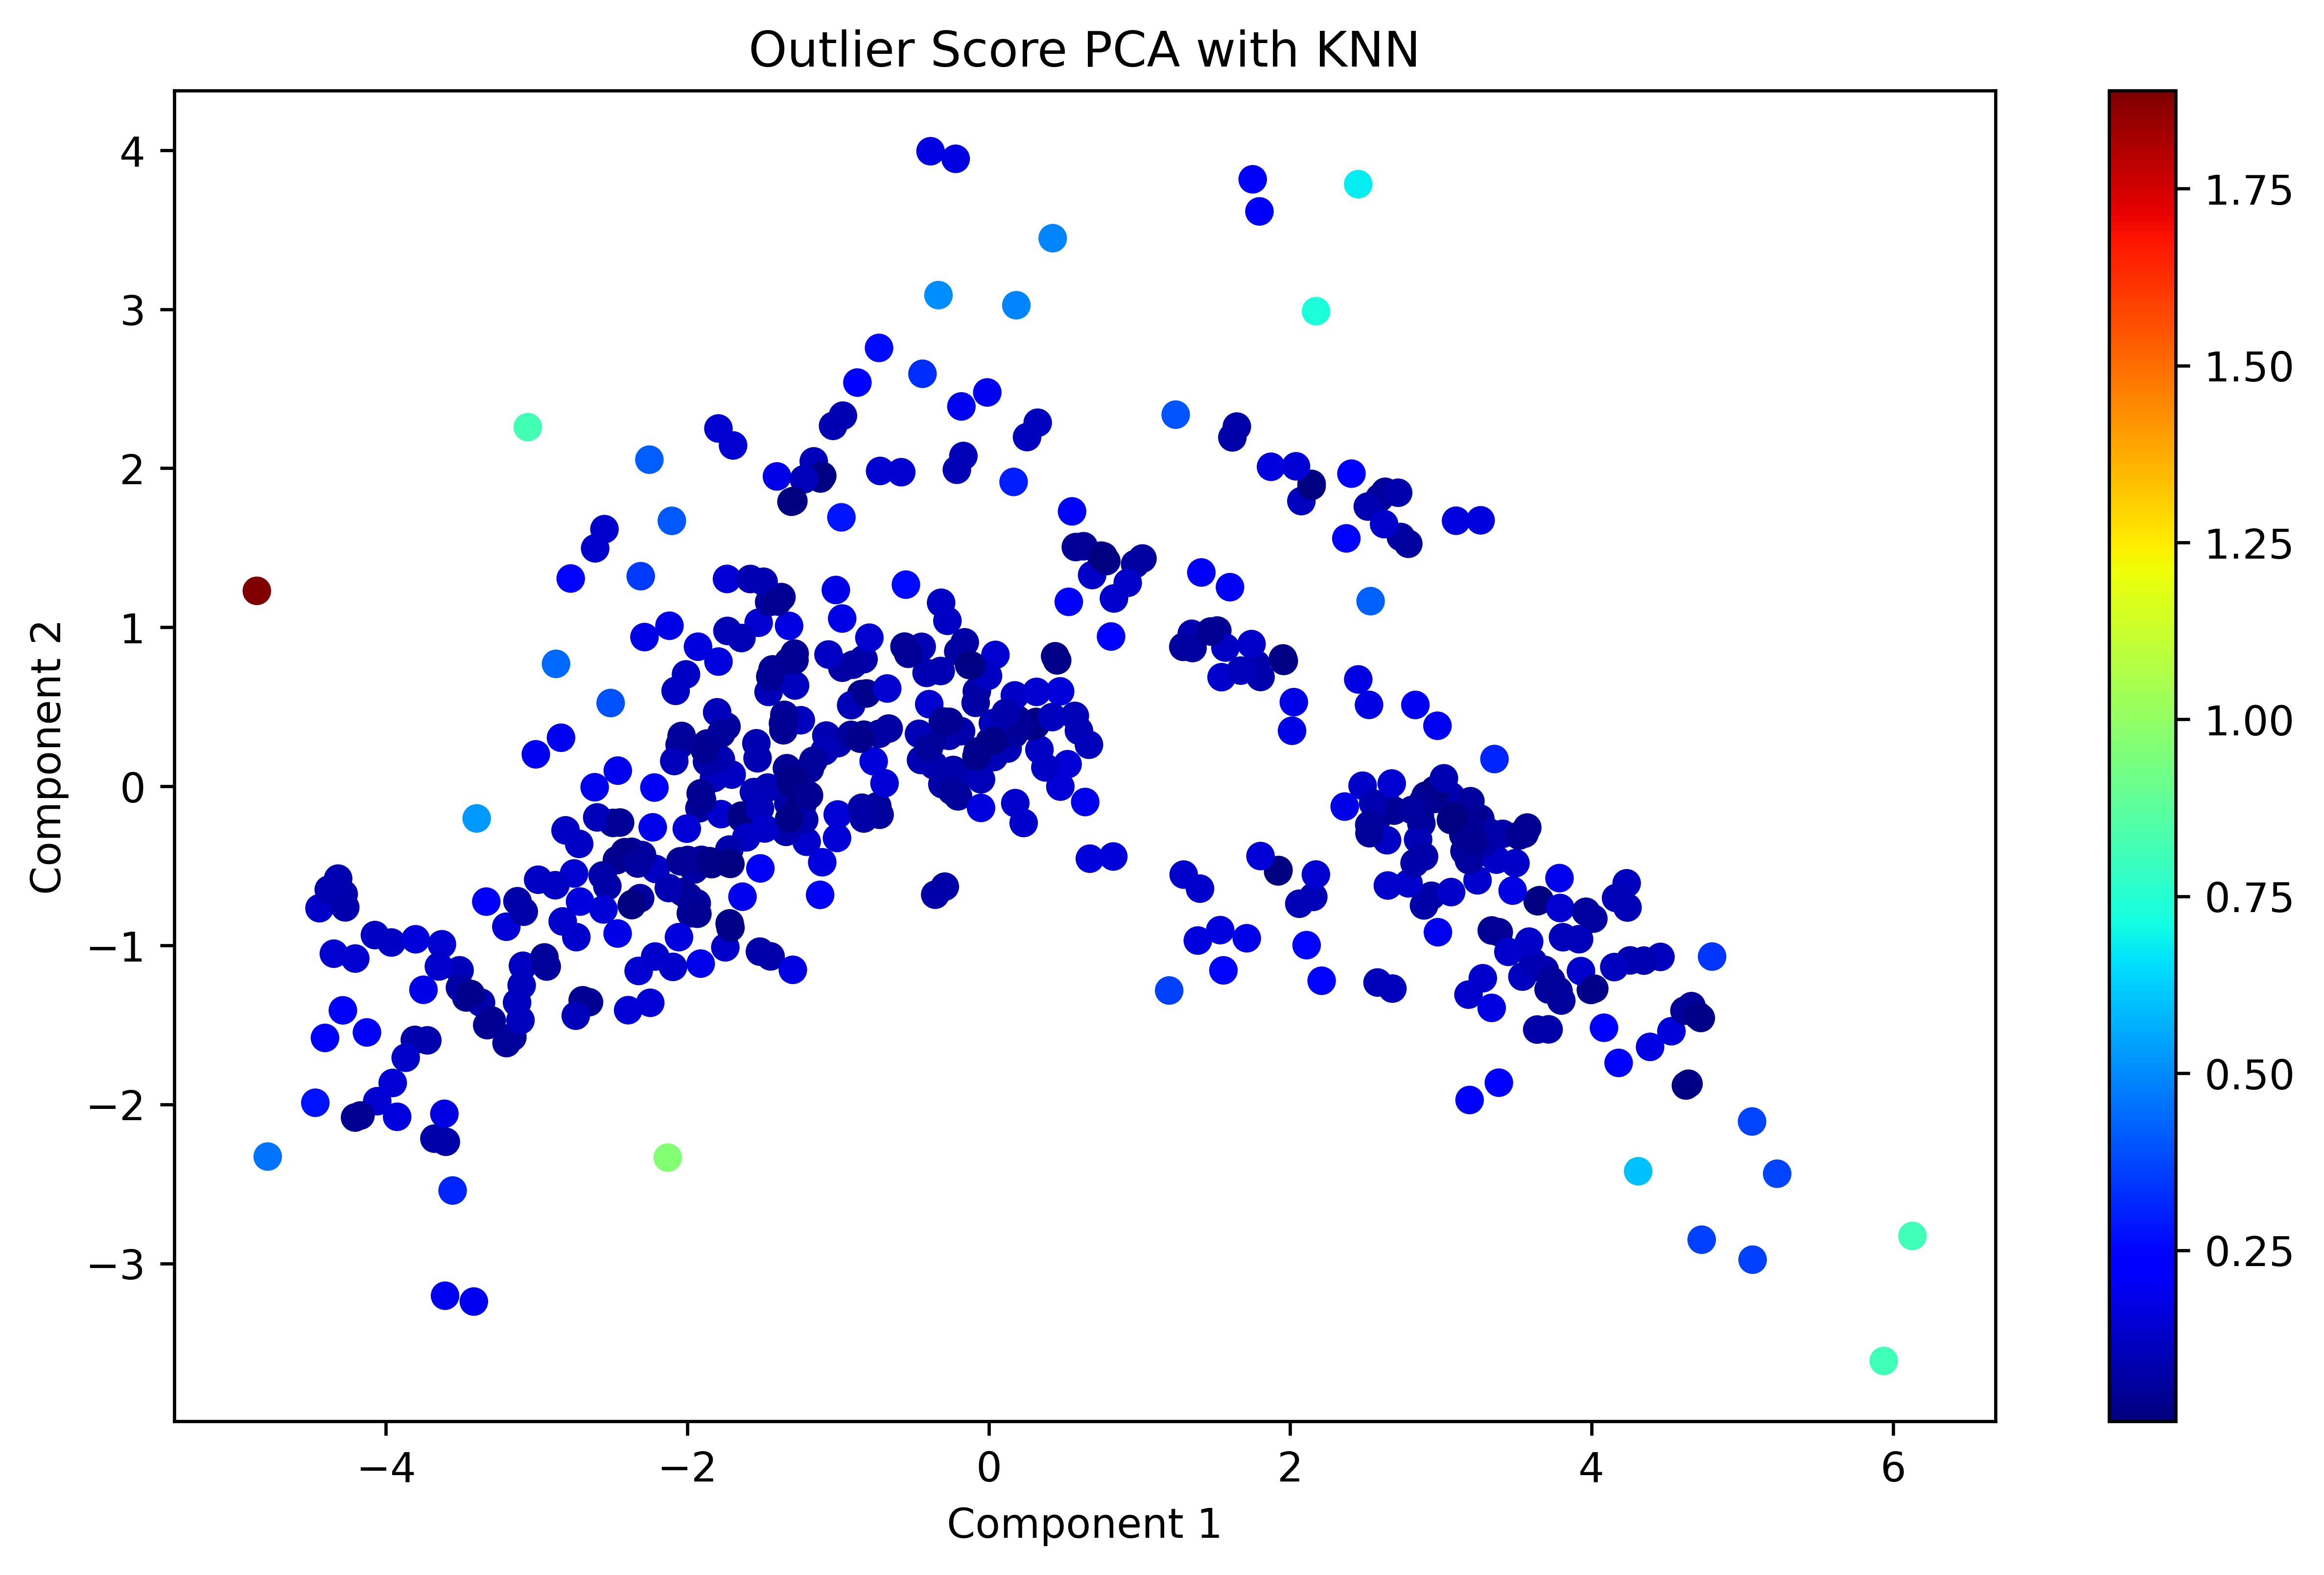

In [20]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# Make a dataframe
reduced = pd.DataFrame(dim_reduced, columns=['dim1','dim2'])

# K-nearest
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(dim_reduced)
distances, indices = nbrs.kneighbors(dim_reduced)
outlier_score = distances[:,knn-1]

# Plot
fig, (a1) = plt.subplots(1,1, figsize=(10,6), dpi=600)
p = a1.scatter(reduced['dim1'],reduced['dim2'],c=outlier_score,cmap='jet')
a1.set_xlabel('Component 1')
a1.set_ylabel('Component 2')
a1.set_title("Outlier Score PCA with KNN")
fig.colorbar(p)
plt.show()